In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [2]:
# Load and preprocess the data
max_features = 400
maxlen = 300

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [4]:

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, BatchNormalization
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score


max_features = 20000  # Aumentamos la cantidad de palabras tomadas en cuenta
maxlen = 600          # Aumentamos la longitud máxima de las reseñas
embedding_size = 256  # Embedding más grande para capturar mejor relaciones entre palabras

# Cargar el dataset IMDB
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)


X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Construcción del modelo mejorado
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(LSTM(128, return_sequences=True))  # Primera capa LSTM
model.add(BatchNormalization())             # Normalización de batch para mejorar estabilidad
model.add(Dropout(0.3))                     # Dropout para evitar sobreajuste
model.add(LSTM(128, return_sequences=False)) # Segunda capa LSTM para mayor complejidad
model.add(Dropout(0.3))                     # Dropout para evitar sobreajuste
model.add(Dense(64, activation='relu'))      # Capa densa intermedia para mayor aprendizaje
model.add(Dropout(0.2))                      # Otro Dropout
model.add(Dense(1, activation='sigmoid'))    # Salida para clasificación binaria

# Optimización y compilación del modelo
optimizer = Adam(learning_rate=0.001)  # Ajuste fino de la tasa de aprendizaje
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Early stopping para evitar sobreentrenamiento
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo mejorado
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, 
          callbacks=[early_stopping])

# Evaluación
score, acc = model.evaluate(X_test, y_test)
print(f"Test Score: {score}")
print(f"Test Accuracy: {acc}")

# Predicción
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")


Epoch 1/10


c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 766s 1s/step - accuracy: 0.6063 - loss: 0.6293 - val_accuracy: 0.8470 - val_loss: 0.3691
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 898ms/step - accuracy: 0.8831 - loss: 0.2978 - val_accuracy: 0.8620 - val_loss: 0.3309
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 550s 880ms/step - accuracy: 0.9145 - loss: 0.2290 - val_accuracy: 0.8638 - val_loss: 0.3279
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 585s 937ms/step - accuracy: 0.9422 - loss: 0.1574 - val_accuracy: 0.8626 - val_loss: 0.3865
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 607s 971ms/step - accuracy: 0.9631 - loss: 0.1060 - val_accuracy: 0.8614 - val_loss: 0.4628
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 512s 819ms/step - accuracy: 0.9767 - loss: 0.0641 - val_accuracy: 0.8706 - val_loss: 0.4298
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - accuracy: 0.8540 - loss: 0.3546
Test Score: 0.34707924723625183
Test Accuracy: 0.8581600189208984
782/782 ━━━━━━━━━━━━━━━━━━━━ 123s 158ms/step
Accuracy: 0.85816


In [5]:
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 828s 2s/step - accuracy: 0.9347 - loss: 0.1805 - val_accuracy: 0.8573 - val_loss: 0.4122
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 872s 2s/step - accuracy: 0.9585 - loss: 0.1215 - val_accuracy: 0.8630 - val_loss: 0.3639
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1041s 3s/step - accuracy: 0.9773 - loss: 0.0725 - val_accuracy: 0.8632 - val_loss: 0.4157
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1206s 3s/step - accuracy: 0.9864 - loss: 0.0443 - val_accuracy: 0.8558 - val_loss: 0.5361
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1226s 3s/step - accuracy: 0.9912 - loss: 0.0287 - val_accuracy: 0.8446 - val_loss: 0.6944
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 48966s 126s/step - accuracy: 0.9930 - loss: 0.0228 - val_accuracy: 0.8652 - val_loss: 0.6347
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1136s 3s/step - accuracy: 0.9909 - loss: 0.0242 - val_accuracy: 0.8586 - val_loss: 0.5711
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1129s 3s/step - accuracy: 0.9932 - loss: 0.0235 -

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}') 

782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 181ms/step - accuracy: 0.8514 - loss: 0.6655
Loss: 0.6461495757102966, Accuracy: 0.8537200093269348


782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 171ms/step


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

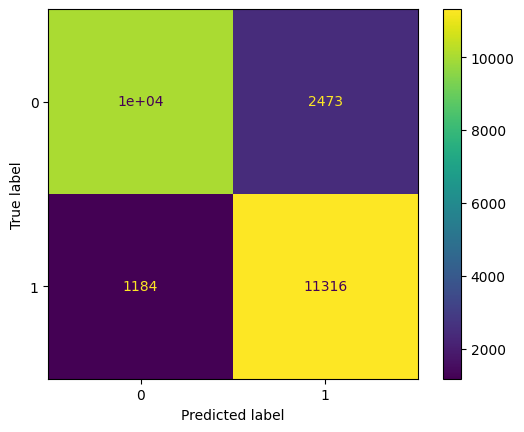

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()
confusion_matrix
